In [1]:
# Step 1: Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller


In [7]:
# Fetching data from YFinance for TSLA, BND, and SPY
tickers = ['TSLA', 'BND', 'SPY']
data = {ticker: yf.download(ticker, start='2015-07-01', end='2025-07-31') for ticker in tickers}

# Save data to CSV files for future use
for ticker, df in data.items():
    df.to_csv(f'../data/{ticker}.csv')

print("Data fetched and saved successfully!")


C:\Users\Misirak\AppData\Local\Temp\ipykernel_18708\3853480811.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = {ticker: yf.download(ticker, start='2015-07-01', end='2025-07-31') for ticker in tickers}
[*********************100%***********************]  1 of 1 completed
C:\Users\Misirak\AppData\Local\Temp\ipykernel_18708\3853480811.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = {ticker: yf.download(ticker, start='2015-07-01', end='2025-07-31') for ticker in tickers}
[*********************100%***********************]  1 of 1 completed
C:\Users\Misirak\AppData\Local\Temp\ipykernel_18708\3853480811.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = {ticker: yf.download(ticker, start='2015-07-01', end='2025-07-31') for ticker in tickers}
[*********************100%***********************]  1 of 1 completed


Data fetched and saved successfully!


In [4]:

# Load the data, skipping the first two rows and setting the correct column names
columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']  # These should match the data columns
tsla = pd.read_csv('../data/TSLA.csv', header=2, names=columns, index_col='Date', parse_dates=True)
bnd = pd.read_csv('../data/BND.csv', header=2, names=columns, index_col='Date', parse_dates=True)
spy = pd.read_csv('../data/SPY.csv', header=2, names=columns, index_col='Date', parse_dates=True)

# Show initial data preview
print("TSLA Data:")
print(tsla.head())
print("BND Data:")
print(bnd.head())
print("SPY Data:")
print(spy.head())


TSLA Data:
                Close       High        Low       Open     Volume
Date                                                             
2015-07-01  17.943333  18.174667  17.856667  18.073999   31518000
2015-07-02  18.667999  18.830000  18.220667  18.680000  107458500
2015-07-06  18.648001  18.779333  18.420000  18.591999   61828500
2015-07-07  17.858667  18.346666  17.384666  18.333332   91576500
2015-07-08  16.997334  17.386667  16.954000  17.288000   93316500
BND Data:
                Close       High        Low       Open   Volume
Date                                                           
2015-07-01  60.816738  60.914464  60.764116  60.794186  5399300
2015-07-02  60.967079  61.027221  60.937008  60.937008  1060100
2015-07-06  61.177567  61.222676  61.057289  61.222676  2210700
2015-07-07  61.237728  61.470769  61.237728  61.410634  4183200
2015-07-08  61.410664  61.463286  61.312932  61.373074  1967800
SPY Data:
                 Close        High         Low        Open 

In [5]:
#  Data Cleaning - Handle missing values
# Check for missing values in each dataset
print(f"TSLA Missing Data: {tsla.isnull().sum()}")
print(f"BND Missing Data: {bnd.isnull().sum()}")
print(f"SPY Missing Data: {spy.isnull().sum()}")

# Fill missing values using forward fill or interpolation
tsla.fillna(method='ffill', inplace=True)
bnd.fillna(method='ffill', inplace=True)
spy.fillna(method='ffill', inplace=True)

print("Missing values handled using forward fill.")


TSLA Missing Data: Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
BND Missing Data: Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
SPY Missing Data: Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Missing values handled using forward fill.


C:\Users\Misirak\AppData\Local\Temp\ipykernel_20452\2124528895.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla.fillna(method='ffill', inplace=True)
C:\Users\Misirak\AppData\Local\Temp\ipykernel_20452\2124528895.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd.fillna(method='ffill', inplace=True)
C:\Users\Misirak\AppData\Local\Temp\ipykernel_20452\2124528895.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy.fillna(method='ffill', inplace=True)


In [13]:
# Normalizing the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler()

# Normalize the closing prices of all assets
tsla['Close'] = scaler.fit_transform(tsla[['Close']])
bnd['Close'] = scaler.fit_transform(bnd[['Close']])
spy['Close'] = scaler.fit_transform(spy[['Close']])

# Clean the 'Return' column by replacing NaN or infinite values
tsla['Return'] = tsla['Return'].replace([np.inf, -np.inf], np.nan).dropna()
bnd['Return'] = bnd['Return'].replace([np.inf, -np.inf], np.nan).dropna()
spy['Return'] = spy['Return'].replace([np.inf, -np.inf], np.nan).dropna()

# Save cleaned and normalized data to CSV for future use
tsla.to_csv('../data/TSLA_cleaned.csv')
bnd.to_csv('../data/BND_cleaned.csv')
spy.to_csv('../data/SPY_cleaned.csv')

print("Data normalization completed.")


Data normalization completed.


In [17]:
# Calculate daily returns for each asset
tsla['Return'] = tsla['Close'].pct_change()
bnd['Return'] = bnd['Close'].pct_change()
spy['Return'] = spy['Close'].pct_change()

# Clean the data by replacing NaN or infinite values in the 'Return' column 
# and dropping rows with NaN in either 'Close' or 'Return'
tsla = tsla.replace([np.inf, -np.inf], np.nan).dropna(subset=['Close', 'Return'])
bnd = bnd.replace([np.inf, -np.inf], np.nan).dropna(subset=['Close', 'Return'])
spy = spy.replace([np.inf, -np.inf], np.nan).dropna(subset=['Close', 'Return'])

# Normalizing the 'Close' prices using MinMaxScaler
scaler = MinMaxScaler()

# Normalize the closing prices of all assets
tsla['Close'] = scaler.fit_transform(tsla[['Close']])
bnd['Close'] = scaler.fit_transform(bnd[['Close']])
spy['Close'] = scaler.fit_transform(spy[['Close']])

# Save cleaned and normalized data to CSV for future use
tsla.to_csv('../data/TSLA_cleaned.csv')
bnd.to_csv('../data/BND_cleaned.csv')
spy.to_csv('../data/SPY_cleaned.csv')

print("Data normalization and cleaning completed.")


Data normalization and cleaning completed.


In [18]:
#  ADF Test for stationarity on daily returns
def adf_test(series):
    result = adfuller(series.dropna())
    return result[0], result[1]  # ADF Statistic and p-value

# Apply ADF test on daily returns for each asset
adf_tsla = adf_test(tsla['Return'])
adf_bnd = adf_test(bnd['Return'])
adf_spy = adf_test(spy['Return'])

# Display ADF test results
print(f"TSLA ADF Statistic: {adf_tsla[0]}, p-value: {adf_tsla[1]}")
print(f"BND ADF Statistic: {adf_bnd[0]}, p-value: {adf_bnd[1]}")
print(f"SPY ADF Statistic: {adf_spy[0]}, p-value: {adf_spy[1]}")


TSLA ADF Statistic: -21.291461253988118, p-value: 0.0
BND ADF Statistic: -10.47535310961191, p-value: 1.2531909507561622e-18
SPY ADF Statistic: -8.411514857467822, p-value: 2.097651543254567e-13


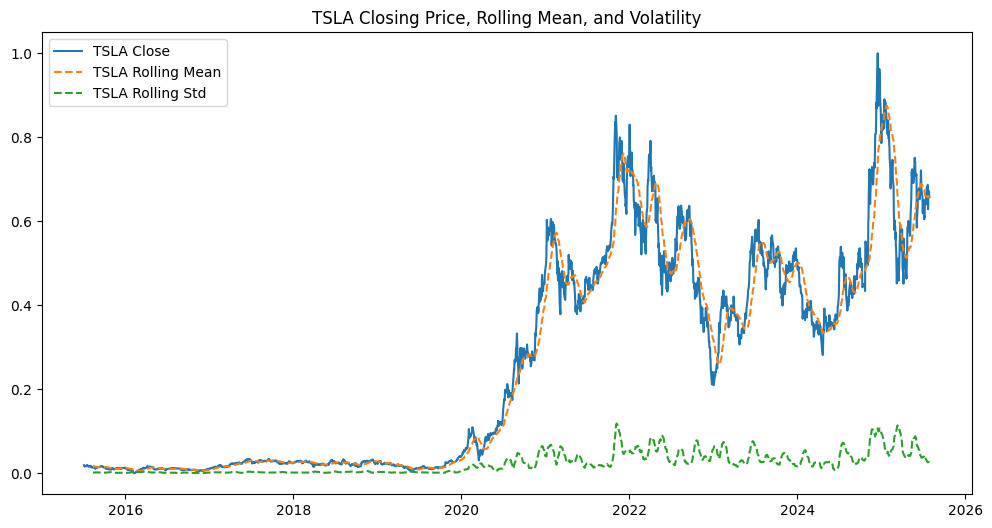

In [19]:
# Calculating rolling means and standard deviations for volatility
window = 30  # 30-day rolling window

# Calculate rolling mean and rolling standard deviation for TSLA, BND, and SPY
tsla['Rolling Mean'] = tsla['Close'].rolling(window=window).mean()
tsla['Rolling Std'] = tsla['Close'].rolling(window=window).std()

bnd['Rolling Mean'] = bnd['Close'].rolling(window=window).mean()
bnd['Rolling Std'] = bnd['Close'].rolling(window=window).std()

spy['Rolling Mean'] = spy['Close'].rolling(window=window).mean()
spy['Rolling Std'] = spy['Close'].rolling(window=window).std()

# Plotting rolling mean and standard deviation for TSLA
plt.figure(figsize=(12, 6))
plt.plot(tsla['Close'], label='TSLA Close')
plt.plot(tsla['Rolling Mean'], label='TSLA Rolling Mean', linestyle='--')
plt.plot(tsla['Rolling Std'], label='TSLA Rolling Std', linestyle='--')
plt.title('TSLA Closing Price, Rolling Mean, and Volatility')
plt.legend()
plt.show()


c:\Users\Misirak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Misirak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Misirak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 2531
Model:                 ARIMA(1, 1, 1)   Log Likelihood                3173.571
Date:                Sun, 10 Aug 2025   AIC                          -6341.141
Time:                        18:19:57   BIC                          -6323.633
Sample:                             0   HQIC                         -6334.789
                               - 2531                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0150      0.005      2.803      0.005       0.004       0.025
ma.L1         -0.9999      0.028    -36.155      0.000      -1.054      -0.946
sigma2         0.0047      0.000     35.374      0.0

c:\Users\Misirak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Misirak\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


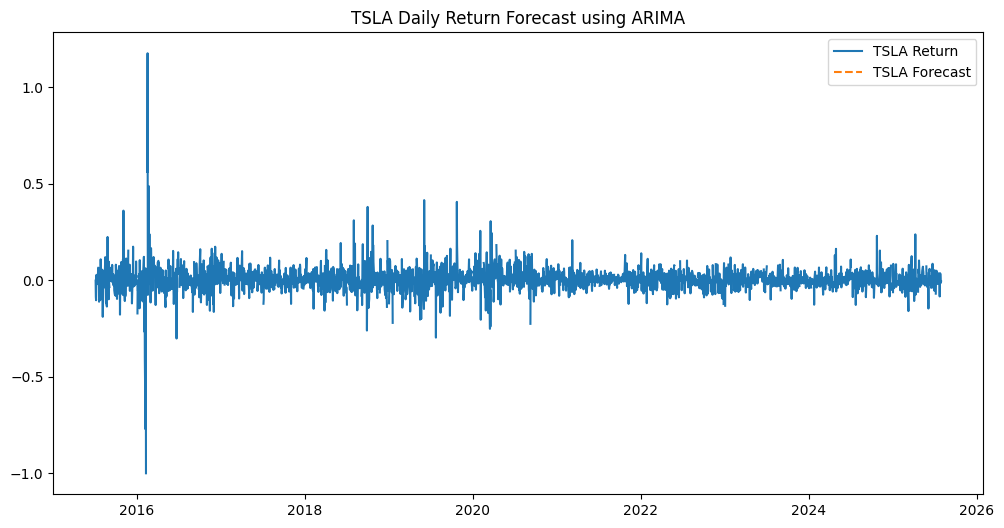

Length of actual returns: 30
Length of forecasted returns: 0
Error: Actual or forecast data is empty, cannot compute MSE.
